In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pickle


def create_skew_symmetric_matrix(n, num_non_zeros, p):
    # Initialize a zero matrix
    A = np.zeros((n, n))

    # Fill in the upper triangle of the matrix with random non-zero values
    # ensuring exactly `num_non_zeros` are non-zero if possible
    elements_set = 0
    for i in range(n):
        for j in range(i+1, n):
            if np.random.rand(1) > p:
                if elements_set < num_non_zeros // 2:
                    value = np.random.uniform(-10, 10)
                    A[i, j] = value
                    A[j, i] = -value
                    elements_set += 1

    return A

12


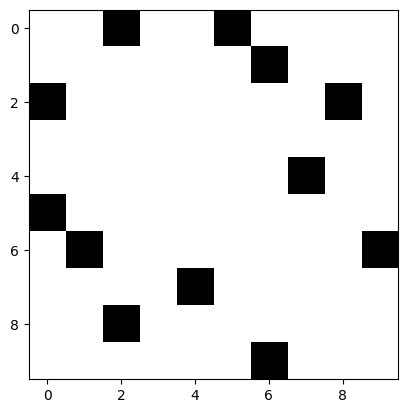

In [18]:
# Generate 1000 A matrices
matrices = []
for _ in range(100000):
    A = create_skew_symmetric_matrix(10, 20, 0.79)
    matrices.append(A)

# Calculate the sum of squares for each matrix
sum_of_squares = []
for A in matrices:
    row_sums = np.sum(np.abs(A), axis=1) - 2
    sum_of_squares.append(np.sum(row_sums**2))

# Rank the matrices based on the sum of squares
ranked_matrices = sorted(zip(matrices, sum_of_squares), key=lambda x: x[1])


plt.imshow(ranked_matrices[0][0]!=0, cmap='binary')
print(np.count_nonzero(ranked_matrices[0][0]))
plt.show()



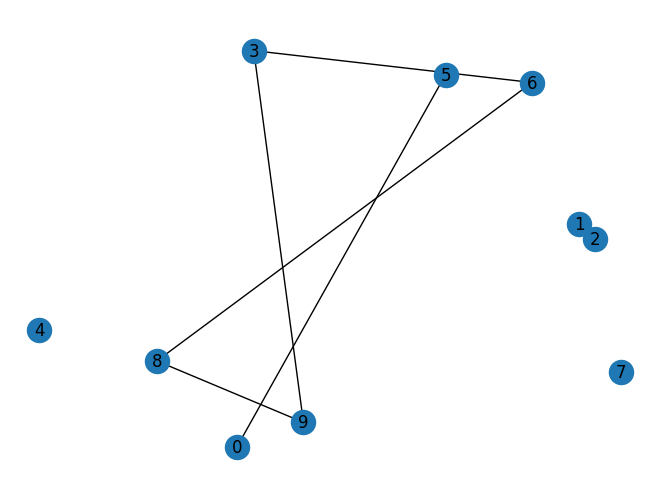

In [96]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph from the adjacency matrix
G = nx.from_numpy_array(ranked_matrices[0][0])

# Compute the layout using the spring layout algorithm
pos = nx.spring_layout(G)

# Draw the graph with nodes pulled apart based on forces
nx.draw(G, pos, with_labels=True)

# Show the graph
plt.show()


In [77]:


# Define the file path where you want to save the pickle file
file_path = 'A_struc_causal_inference.pkl'

# Open the file in binary mode
with open(file_path, 'wb') as file:
    # Dump the data to the pickle file
    pickle.dump(ranked_matrices[0][0], file)


In [8]:
with open('A_struc_causal_inference.pkl', 'rb') as f:
    A = pickle.load(f)

In [11]:
import numpy as np

# Define the number of time points
num_time_points = 20

# Define the dimension of the state matrix
n = A.shape[0]

# Generate a random initial condition
initial_condition = np.random.rand(n)

# Initialize an array to store the state at each time point
state_trajectory = np.zeros((num_time_points, n))

# Set the initial condition
state_trajectory[0] = initial_condition

# Simulate the system for each time point
for t in range(1, num_time_points):
    state_trajectory[t] = np.dot(A, state_trajectory[t-1])

# Print the state trajectory
print("State Trajectory:")
print(state_trajectory)


State Trajectory:
[[ 3.49080649e-02  5.06710197e-01  3.52982716e-01  8.15796303e-01
   5.46508027e-01  6.96577000e-01  8.74168074e-01  9.03706877e-02
   7.35781982e-01  1.09940438e-01]
 [-2.24189951e+00 -1.62977813e+00  0.00000000e+00  7.36333160e-01
   2.04707429e-01  1.28379686e-02 -4.12778678e-01  3.40372688e+00
   6.14451308e-01 -1.96734330e+00]
 [ 4.27957263e+00 -4.17792564e+00  0.00000000e+00 -2.97726722e+00
  -3.66316340e+00 -9.34806687e+00 -1.22391176e+01 -7.63963811e-01
  -5.22499115e-01 -1.88922548e+00]
 [ 2.54063851e+01  3.06537761e+01  0.00000000e+00 -3.68243392e+00
  -3.51770921e+00 -1.02265321e+00  4.00927744e+00 -4.94619803e+01
  -1.41449711e+01  5.38660791e+00]
 [-7.34749688e+01  4.94800615e+01  0.00000000e+00 -1.07161916e+00
   1.00297823e+01  1.48133812e+02  1.90420278e+02  6.04441565e+00
   9.36851063e-01  1.51450803e+01]
 [-3.73962607e+02 -4.96220838e+02  0.00000000e+00  2.71138246e+01
   2.81999099e+01 -2.25123694e+01 -3.18281144e+01  7.72157526e+02
   2.59857577e+

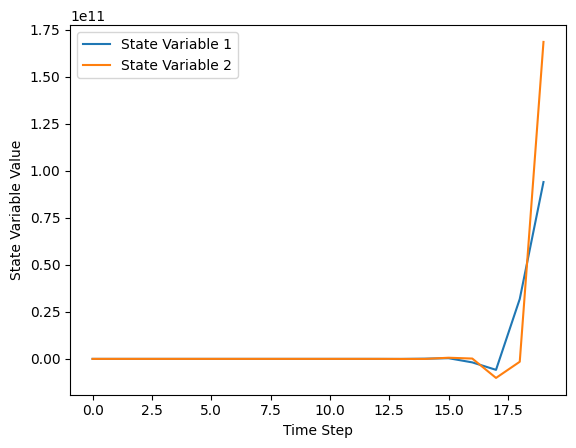

In [12]:
import matplotlib.pyplot as plt

# Extract the first 2 state variables
state_var1 = state_trajectory[:, 0]
state_var2 = state_trajectory[:, 1]

# Plot the evolution of the first 2 state variables
plt.plot(range(num_time_points), state_var1, label='State Variable 1')
plt.plot(range(num_time_points), state_var2, label='State Variable 2')

# Add labels and legend
plt.xlabel('Time Step')
plt.ylabel('State Variable Value')
plt.legend()

# Show the plot
plt.show()
